In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data from CSV
data_types ={
    'Site': str,
    'Date': str,
    'Time': str,
    'Hour': int,
    'TempOut': float,
    'HiTemp': float,
    'LowTemp': float,
    'OutHum': float,
    'DewPt': float,
    'WindSpeed': float,
    'WindDir': str,
    'WindRun': float,
    'HiSpeed': float,
    'HiDir': str,
    'WindChill': float,
    'HeatIndex': float,
    'THSWIndex': float,
    'Bar': float,
    'Rain': float,
    'RainRate': float,
    'SolarRad': float,
    'SolarEnergy': float,
    'HiSolarRad': float,
    'HeatD-D': float,
    'CoolD-D': float,
    'InTemp': float,
    'InHum': float,
    'InDew': float,
    'InHeat': float,
    'InEMC': float,
    'InAirDensity': float,
    'ET': float,
    'WindSamp': float,
    'WindTx': float,
    'ISSRecept': float,
    'ArcInt': float}

data = pd.read_csv('SolarData2014.csv', dtype=data_types)

In [ ]:
# Select relevant features for the autoencoder
features = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed', 'SolarRad']
data = data[features]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data, test_data = train_test_split(normalized_data, test_size=0.2, random_state=42)


In [ ]:
# Build the autoencoder model
input_dim = len(features)
encoding_dim = 3  # You can adjust the number of neurons in the hidden layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_layer = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=100, batch_size=32, shuffle=True, validation_data=(test_data, test_data))

# Encode the data using the trained autoencoder
encoded_data = autoencoder.predict(normalized_data)

# Now you can use the encoded data for further analysis or prediction tasks

Epoch 1/100
1737/1737 [==============================] - 6s 3ms/step - loss: 0.8622 - val_loss: 0.6852
Epoch 2/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6653 - val_loss: 0.6383
Epoch 3/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6345 - val_loss: 0.6154
Epoch 4/100
1737/1737 [==============================] - 5s 3ms/step - loss: 0.6190 - val_loss: 0.6058
Epoch 5/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6127 - val_loss: 0.6019
Epoch 6/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6099 - val_loss: 0.5999
Epoch 7/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6084 - val_loss: 0.5988
Epoch 8/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6076 - val_loss: 0.5981
Epoch 9/100
1737/1737 [==============================] - 4s 2ms/step - loss: 0.6070 - val_loss: 0.5977
Epoch 10/100
1737/1737 [==============================] - 4s 2ms/step - l

2172/2172 [==============================] - 5s 2ms/step


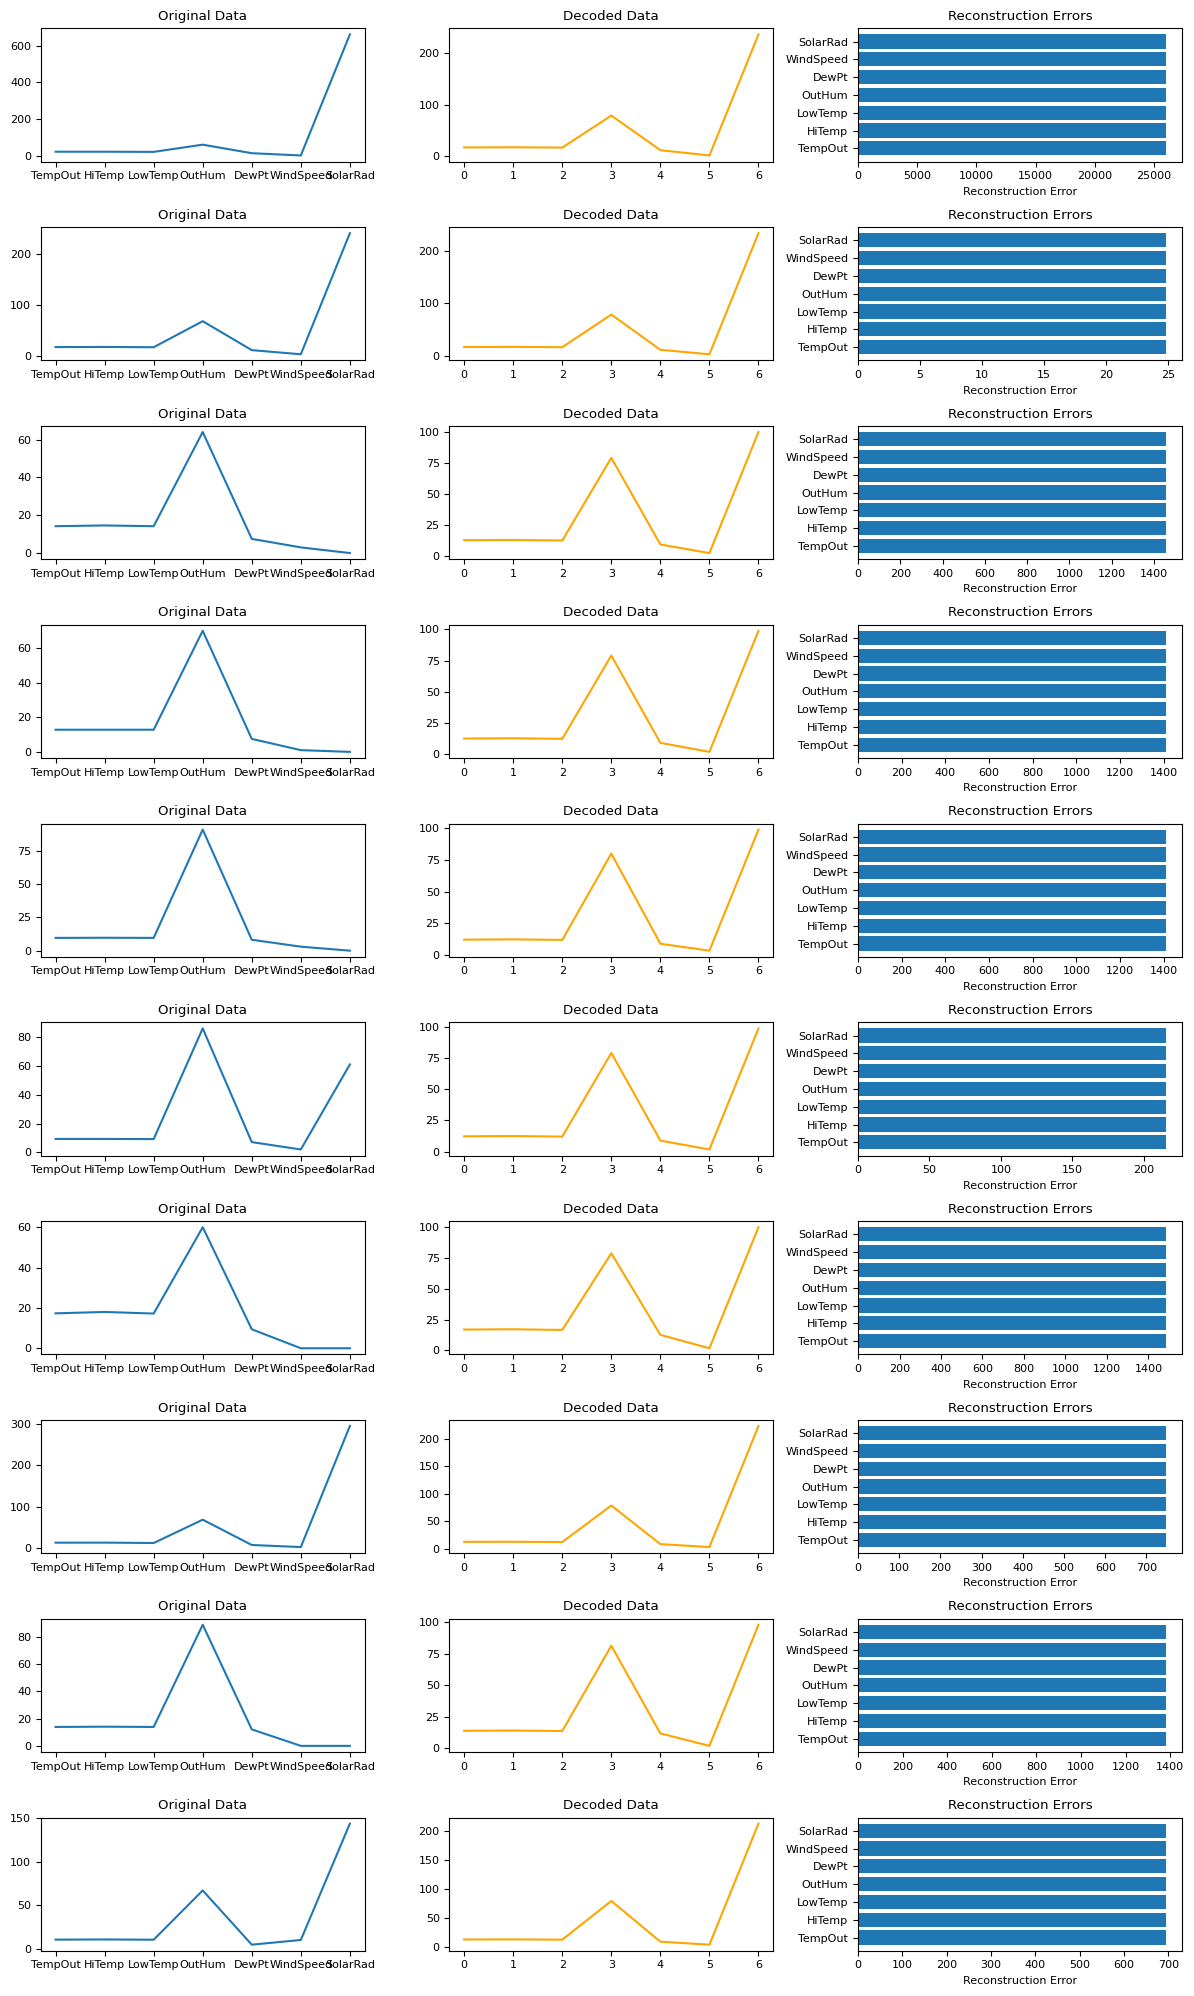

In [ ]:
import matplotlib.pyplot as plt

# Decode the encoded data
decoded_data = autoencoder.predict(encoded_data)

# Inverse transform the decoded data to get it back to the original scale
decoded_data = scaler.inverse_transform(decoded_data)

# Calculate the reconstruction errors
reconstruction_errors = np.mean(np.square(data - decoded_data), axis=1)

# Set the font size for the entire figure
plt.rcParams.update({'font.size': 8})

# Increase the height of the graphs
fig_height = 20  # Adjust this value to your preference

# Visualize some original data, decoded data, and errors
num_samples = 10
sample_indices = np.random.randint(0, len(data), num_samples)

plt.figure(figsize=(12, fig_height))

for i, index in enumerate(sample_indices):
    plt.subplot(num_samples, 3, i*3 + 1)
    plt.plot(data.iloc[index], label='Original')
    plt.title('Original Data')

    plt.subplot(num_samples, 3, i*3 + 2)
    plt.plot(decoded_data[index], label='Decoded', color='orange')
    plt.title('Decoded Data')

    plt.subplot(num_samples, 3, i*3 + 3)
    plt.barh(range(len(features)), reconstruction_errors[index])
    plt.yticks(range(len(features)), features)
    plt.xlabel('Reconstruction Error')
    plt.title('Reconstruction Errors')

plt.tight_layout()
plt.show()
